# Programming Assignment #2: Optimization & Linear Models

> NOTE: Please use Python 3 when compliing and Conda version used in development is 4.3.27. The only libraries needed are numpy, matplotlib. I have run the Perceptron algorithm for 8000 iterations and saved this notebook for reference. Please change this to 500 to save time while you grade this assignment. The saved version of this notebook can also be accessed from the html file saved this is directory as well.

In [5]:
#import the dependencies 

import numpy as np
import matplotlib.pyplot as plt

## 1. Perceptron Algorithm for Logistic Regression

1.1 Lets check the data. Its should be present in the ./bclass folder. The training data is split into two sets training data ./bclass/bclass-train and test data ./bclass/bclass-test. The demonstrates one of the training sample.

In [6]:
with open("bclass/bclass-train") as file:
    num_of_samples = N = 0
    num_of_features = M = 0
    for i,line in enumerate(file):
        if i == 0:
            print(line)
            num_of_features = M = len(line.split()) - 1        
    num_of_samples = N = i + 1

-1	1	0	0.62121	-0.63636	0	0	0	0	0.34470	0.28788	0.42803	0.39394	-0.07576	0.51894	0.36364	0.31439	-0.53788	0.32955	0.12121	-0.14773	0.01894	-0.53409	-0.57576	0.17803	0.29167	-0.27273	0.25758	-0.57576	0.43182	0.24242	0.18182	-0.02273	0.17045	-0.41667



So there are 34 features and the first colulmn is the prediction(-1,1). I will take a numpy two dimensional array for representing the feature vector in both train and test case.

In [7]:
def acquireData():
    with open("bclass/bclass-train") as file:

        feature_train = np.zeros([N,M])
        label_train = np.zeros(N)
        for i,line in enumerate(file):
            line = line.split()
            label_train[i], feature_train[i] = float(line[0]) , list(map(float,line[1:]))

    num_of_samples_test = sum(1 for line in open("bclass/bclass-test"))

    with open("bclass/bclass-test") as file:

        feature_test = np.zeros([num_of_samples_test,M])
        label_test = np.zeros(num_of_samples_test)
        for i,line in enumerate(file):
            line = line.split()
            label_test[i], feature_test[i] = float(line[0]) , list(map(float,line[1:]))
    return feature_train,label_train,feature_test,label_test
feature_train,label_train,feature_test,label_test = acquireData()

1.2 Now we are done with the loading the data. Lets dive into the Perceptron algorithm.

In [5]:
def sign(X):
    if(X>=0):
        return 1
    else:
        return -1

signfunc = np.vectorize(sign)

def findInvalidClassification(weights,bias,train_data,train_labels):
    for i in range(train_data.shape[0]):
        if(train_labels[i] != sign(np.dot(weights,train_data[i])+bias)):
            return i
    
    print("\n\n \"VOILA!!!!!!!!!  ZERO ERROR NOW FULLY CLASSIFIED\"")
    return -1

def trainErrorRate(train_data, train_labels,weights,bias):
    numOfErrors = 0
    for i in range(train_data.shape[0]):
        if(train_labels[i] != sign(np.dot(weights,train_data[i])+bias)):
            numOfErrors+=1
    return numOfErrors/train_data.shape[0]*100

def testErrorRate(test_data, test_labels,weights,bias):
    numOfErrors = 0
    for i in range(test_data.shape[0]):
        if(test_labels[i] != sign(np.dot(weights,test_data[i])+bias)):
            numOfErrors+=1
    return numOfErrors/test_data.shape[0]*100

def buildPerceptron(train_data, train_labels, test_data, test_labels):
    weights = np.zeros(num_of_features)
    bias = 0
    iterations = 8000
    t = 0
    trainErrorRates = np.zeros(iterations)
    testErrorRates = np.zeros(iterations)
    
    while(t<iterations):
        sampleNumber = findInvalidClassification(weights,bias,train_data,train_labels)
        if(sampleNumber == -1):
            print("Running ",t-10,"Iterations, The Error rate is ",0)
            break
        else:
            weights = weights + train_labels[sampleNumber]*train_data[sampleNumber]
            
            bias = bias + train_labels[sampleNumber]
            
        trainErrorRates[t] = trainErrorRate(train_data, train_labels,weights,bias)
        testErrorRates[t] = testErrorRate(test_data,test_labels,weights,bias)
        if(t > 9):
            print("Running ",t-10,"Iterations, The Training Error rate is ",np.sum(trainErrorRates[t-9:t+1])/10," and the Test Error rate \
is ",np.sum(testErrorRates[t-9:t+1])/10)
        t+=1
    return trainErrorRates,testErrorRates


In [6]:
trainErrorRates,testErrorRates = buildPerceptron(feature_train, label_train, feature_test, label_test)

Running  0 Iterations, The Training Error rate is  38.25  and the Test Error rate is  43.2894736842
Running  1 Iterations, The Training Error rate is  35.3  and the Test Error rate is  38.5526315789
Running  2 Iterations, The Training Error rate is  34.9  and the Test Error rate is  37.7631578947
Running  3 Iterations, The Training Error rate is  38.9  and the Test Error rate is  41.1842105263
Running  4 Iterations, The Training Error rate is  36.6  and the Test Error rate is  37.5
Running  5 Iterations, The Training Error rate is  39.4  and the Test Error rate is  39.7368421053
Running  6 Iterations, The Training Error rate is  36.8  and the Test Error rate is  35.9210526316
Running  7 Iterations, The Training Error rate is  36.5  and the Test Error rate is  34.7368421053
Running  8 Iterations, The Training Error rate is  36.35  and the Test Error rate is  34.2105263158
Running  9 Iterations, The Training Error rate is  36.35  and the Test Error rate is  33.9473684211
Running  10 Iter

The Error rate for 0 after 6291 iterations. So lets move on to L1 norm and preprocess the data.

In [7]:
def preprocessUsingl1Norm(data):
    l1norm = np.absolute(data)
    tdata = np.zeros_like(data)
    l1norm = l1norm.sum(1)
    for i in range(data.shape[0]):
        tdata[i] = data[i]/l1norm[i]
    return tdata
feature_train_l1Normalized = preprocessUsingl1Norm(feature_train)
feature_test_l1Normalized = preprocessUsingl1Norm(feature_test)

In [8]:
trainErrorRatesL1Norm,testErrorRatesL1Norm = buildPerceptron(feature_train_l1Normalized, label_train,feature_test_l1Normalized, label_test)

Running  0 Iterations, The Training Error rate is  43.3  and the Test Error rate is  43.1578947368
Running  1 Iterations, The Training Error rate is  43.3  and the Test Error rate is  43.4210526316
Running  2 Iterations, The Training Error rate is  43.3  and the Test Error rate is  43.4210526316
Running  3 Iterations, The Training Error rate is  44.2  and the Test Error rate is  45.0
Running  4 Iterations, The Training Error rate is  44.2  and the Test Error rate is  45.0
Running  5 Iterations, The Training Error rate is  40.95  and the Test Error rate is  40.6578947368
Running  6 Iterations, The Training Error rate is  43.55  and the Test Error rate is  44.0789473684
Running  7 Iterations, The Training Error rate is  43.25  and the Test Error rate is  45.3947368421
Running  8 Iterations, The Training Error rate is  45.85  and the Test Error rate is  48.8157894737
Running  9 Iterations, The Training Error rate is  47.4  and the Test Error rate is  50.9210526316
Running  10 Iterations, 

The Error rate is still the same, so I am trying with l2 norm

In [9]:
def preprocessUsingl2Norm(data):
    l1norm = np.power(data,2)
    tdata = np.zeros_like(data)
    l1norm = l1norm.sum(1)
    l1norm = np.sqrt(l1norm)
    for i in range(data.shape[0]):
        tdata[i] = data[i]/l1norm[i]
    return tdata
feature_train_l2Normalized = preprocessUsingl2Norm(feature_train)
feature_test_l2Normalized = preprocessUsingl2Norm(feature_test)

In [10]:
trainErrorRatesL2Norm,testErrorRatesL2Norm = buildPerceptron(feature_train_l2Normalized, label_train, feature_test_l2Normalized, label_test)

Running  0 Iterations, The Training Error rate is  45.1  and the Test Error rate is  46.9736842105
Running  1 Iterations, The Training Error rate is  44.95  and the Test Error rate is  46.4473684211
Running  2 Iterations, The Training Error rate is  44.85  and the Test Error rate is  46.4473684211
Running  3 Iterations, The Training Error rate is  44.3  and the Test Error rate is  46.0526315789
Running  4 Iterations, The Training Error rate is  43.65  and the Test Error rate is  45.5263157895
Running  5 Iterations, The Training Error rate is  40.4  and the Test Error rate is  41.3157894737
Running  6 Iterations, The Training Error rate is  41.95  and the Test Error rate is  44.3421052632
Running  7 Iterations, The Training Error rate is  39.5  and the Test Error rate is  41.1842105263
Running  8 Iterations, The Training Error rate is  38.3  and the Test Error rate is  40.3947368421
Running  9 Iterations, The Training Error rate is  38.6  and the Test Error rate is  40.2631578947
Runnin

The L2 Normalized data gets separated with 733 iterations. The data preprocessing is here to identify the linear surface of separation.

1.3 Lets now move into plotting the error rate as a function of iteration.

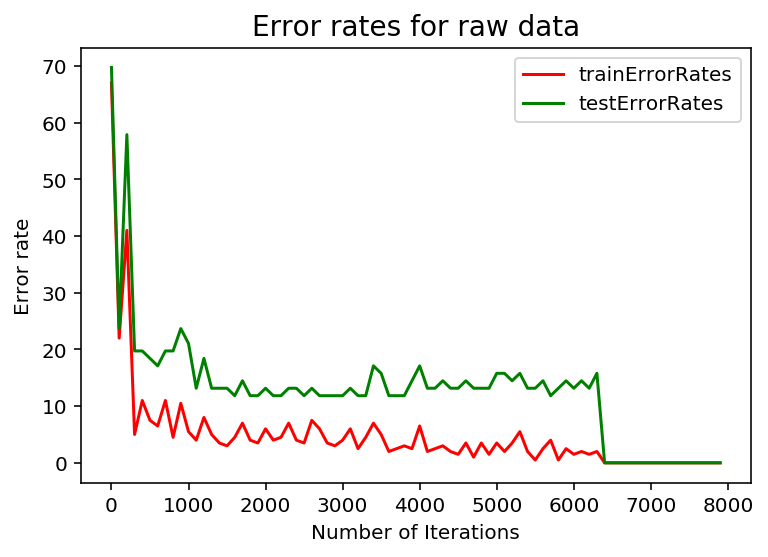

In [11]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(trainErrorRates) if i%100 == 0], 'r',label = "trainErrorRates")
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(testErrorRates) if i%100 == 0], 'g', label = "testErrorRates")
legend = ax.legend()
plt.title("Error rates for raw data", fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Error rate")
plt.show();

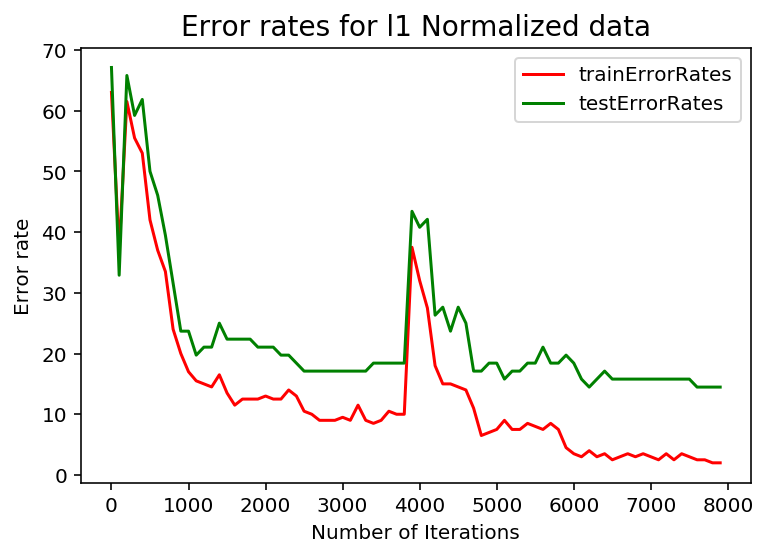

In [12]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(trainErrorRatesL1Norm) if i%100 == 0], 'r',label = "trainErrorRates")
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(testErrorRatesL1Norm) if i%100 == 0], 'g', label = "testErrorRates")
legend = ax.legend()
plt.title("Error rates for l1 Normalized data", fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Error rate")
plt.show();

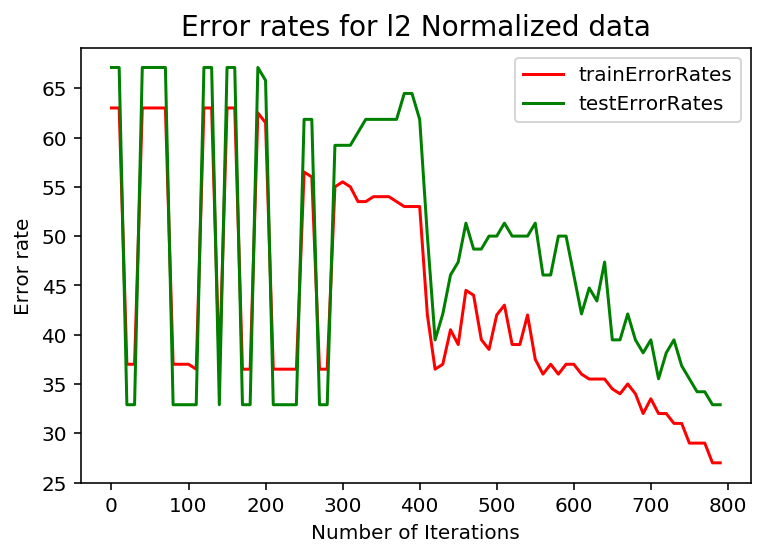

In [13]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(list(range(0,800,10)), [err for i,err in enumerate(trainErrorRatesL1Norm) if (i%10  == 0 and i < 800)], 'r',label = "trainErrorRates")
ax.plot(list(range(0,800,10)), [err for i,err in enumerate(testErrorRatesL1Norm) if (i%10  == 0 and i < 800)], 'g', label = "testErrorRates")
legend = ax.legend()
plt.title("Error rates for l2 Normalized data", fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Error rate")
plt.show();

1.4 Rewriting the perpectron algorithm and using the average weights instead of the original updated weights.

In [14]:
def buildPerceptronUsingAverageWeights(train_data, train_labels, test_data, test_labels):
    weights = np.zeros(num_of_features)
    newWeights = weights
    bias = 0
    newBias = bias
    iterations = 8000
    t = 0
    trainErrorRates = np.zeros(iterations)
    testErrorRates = np.zeros(iterations)
    
    while(t<iterations):
        sampleNumber = findInvalidClassification(weights,bias,train_data,train_labels)
        if(sampleNumber == -1):
            print("Running ",t-10,"Iterations, The Error rate is ",0)
            break
        else:
            weights = weights + train_labels[sampleNumber]*train_data[sampleNumber]
            newWeights = (weights + newWeights*t)/(t+1)
            bias = bias + train_labels[sampleNumber]
            newBias = (bias + newBias*t)/(t+1)
        trainErrorRates[t] = trainErrorRate(train_data, train_labels,newWeights,newBias)
        testErrorRates[t] = testErrorRate(test_data,test_labels,newWeights,newBias)
        if(t > 9):
            print("Running ",t-10,"Iterations, The Training Error rate is ",np.sum(trainErrorRates[t-9:t+1])/10," and the Test Error rate \
is ",np.sum(testErrorRates[t-9:t+1])/10)
        t+=1
    return trainErrorRates,testErrorRates

feature_train,label_train,feature_test,label_test = acquireData()

feature_train_l1Normalized = preprocessUsingl1Norm(feature_train)
feature_test_l1Normalized = preprocessUsingl1Norm(feature_test)

feature_train_l2Normalized = preprocessUsingl2Norm(feature_train)
feature_test_l2Normalized = preprocessUsingl2Norm(feature_test)

In [15]:
trainErrorRates,testErrorRates = buildPerceptronUsingAverageWeights(feature_train, label_train, feature_test, label_test)

Running  0 Iterations, The Training Error rate is  49.9  and the Test Error rate is  58.0263157895
Running  1 Iterations, The Training Error rate is  47.6  and the Test Error rate is  55.7894736842
Running  2 Iterations, The Training Error rate is  44.9  and the Test Error rate is  52.2368421053
Running  3 Iterations, The Training Error rate is  45.5  and the Test Error rate is  52.2368421053
Running  4 Iterations, The Training Error rate is  43.05  and the Test Error rate is  48.9473684211
Running  5 Iterations, The Training Error rate is  41.2  and the Test Error rate is  46.9736842105
Running  6 Iterations, The Training Error rate is  38.75  and the Test Error rate is  43.5526315789
Running  7 Iterations, The Training Error rate is  36.35  and the Test Error rate is  40.3947368421
Running  8 Iterations, The Training Error rate is  33.4  and the Test Error rate is  37.1052631579
Running  9 Iterations, The Training Error rate is  30.9  and the Test Error rate is  34.2105263158
Running

In [16]:
trainErrorRatesL1Norm,testErrorRatesL1Norm = buildPerceptronUsingAverageWeights(feature_train_l1Normalized, label_train, feature_test_l1Normalized, label_test)

Running  0 Iterations, The Training Error rate is  43.25  and the Test Error rate is  42.1052631579
Running  1 Iterations, The Training Error rate is  40.65  and the Test Error rate is  38.6842105263
Running  2 Iterations, The Training Error rate is  38.9  and the Test Error rate is  35.5263157895
Running  3 Iterations, The Training Error rate is  37.0  and the Test Error rate is  32.8947368421
Running  4 Iterations, The Training Error rate is  37.0  and the Test Error rate is  32.8947368421
Running  5 Iterations, The Training Error rate is  37.0  and the Test Error rate is  32.8947368421
Running  6 Iterations, The Training Error rate is  37.0  and the Test Error rate is  32.8947368421
Running  7 Iterations, The Training Error rate is  37.0  and the Test Error rate is  32.8947368421
Running  8 Iterations, The Training Error rate is  36.95  and the Test Error rate is  32.8947368421
Running  9 Iterations, The Training Error rate is  36.9  and the Test Error rate is  32.8947368421
Running

In [17]:
trainErrorRatesL2Norm,testErrorRatesL2Norm = buildPerceptronUsingAverageWeights(feature_train_l2Normalized, label_train, feature_test_l2Normalized, label_test)

Running  0 Iterations, The Training Error rate is  49.3  and the Test Error rate is  56.4473684211
Running  1 Iterations, The Training Error rate is  47.05  and the Test Error rate is  54.6052631579
Running  2 Iterations, The Training Error rate is  44.4  and the Test Error rate is  51.3157894737
Running  3 Iterations, The Training Error rate is  41.8  and the Test Error rate is  48.6842105263
Running  4 Iterations, The Training Error rate is  37.95  and the Test Error rate is  44.7368421053
Running  5 Iterations, The Training Error rate is  35.1  and the Test Error rate is  41.4473684211
Running  6 Iterations, The Training Error rate is  32.15  and the Test Error rate is  37.6315789474
Running  7 Iterations, The Training Error rate is  29.0  and the Test Error rate is  33.8157894737
Running  8 Iterations, The Training Error rate is  28.55  and the Test Error rate is  32.7631578947
Running  9 Iterations, The Training Error rate is  27.7  and the Test Error rate is  31.7105263158
Runnin

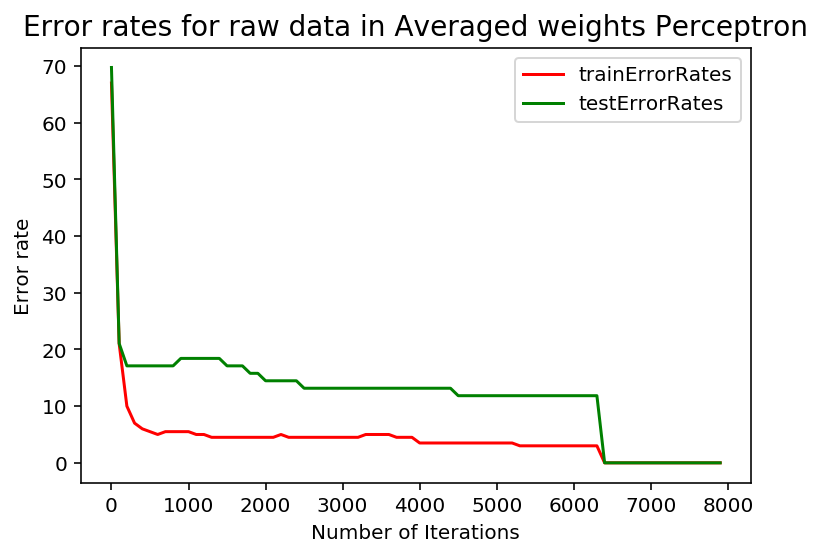

In [18]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(trainErrorRates) if i%100 == 0], 'r',label = "trainErrorRates")
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(testErrorRates) if i%100 == 0], 'g', label = "testErrorRates")
legend = ax.legend()
plt.title("Error rates for raw data in Averaged weights Perceptron", fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Error rate")
plt.show();

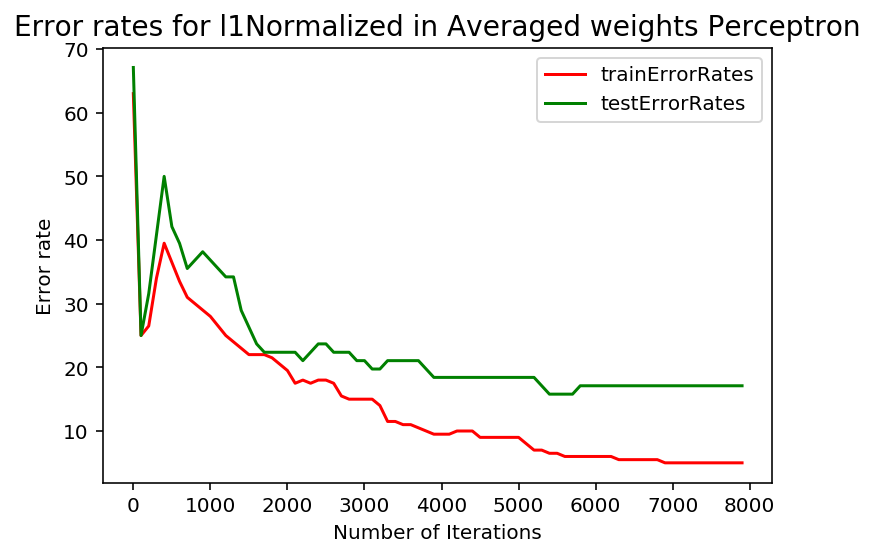

In [19]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(trainErrorRatesL1Norm) if i%100 == 0], 'r',label = "trainErrorRates")
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(testErrorRatesL1Norm) if i%100 == 0], 'g', label = "testErrorRates")
legend = ax.legend()
plt.title("Error rates for l1Normalized in Averaged weights Perceptron", fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Error rate")
plt.show();

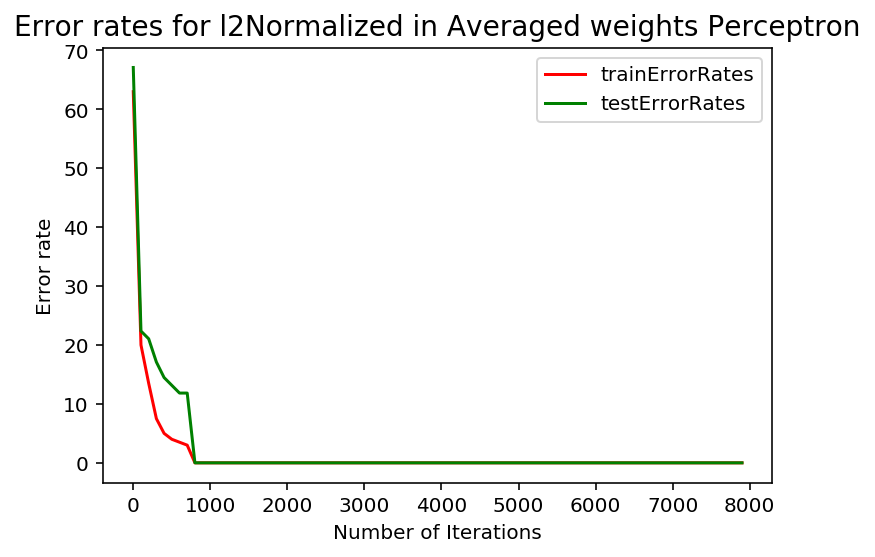

In [20]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(trainErrorRatesL2Norm) if i%100 == 0], 'r',label = "trainErrorRates")
ax.plot(list(range(0,8000,100)),[err for i,err in enumerate(testErrorRatesL2Norm) if i%100 == 0], 'g', label = "testErrorRates")
legend = ax.legend()
plt.title("Error rates for l2Normalized in Averaged weights Perceptron", fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Error rate")
plt.show();

1.5 The two versions of the perceptron differ very much. The key issue with perceptron is that it counts later points more than it counts earlier points. The averaged perceptron performance with the l2normalized data is very good and it achieves the convergence within 800 iterations. The advantage of average perceptron is that we can simply maintain a running sum of the average weight vector and average bias. The averaged perceptron is almost always better than the perceptron, in the sense that it generalizes better to the data. However, it doesnot free us from having to do early stopping. We only stop when we have 0 training error.

## 2. Gradient descent/ascent algorithm for logistic regression.

2.1 Lets run logistic regression on the data

In [10]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-1.0*x))

def trainErrorRate(train_data, train_labels,weights,bias):
    
    sum = 0
    for i in range(num_of_samples):
        h = sigmoid(np.dot(train_data[i], weights)+bias)
        if h == 0:
            h = 0.00001
        if h == 1:
            h = 0.99999
        y = train_labels[i]
        sum += -(y*np.log(h)+(1-y)*np.log(1-h))
        
    return sum/num_of_samples

def testErrorRate(test_data, test_labels,weights,bias):
    
    sum = 0
    for i in range(test_data.shape[0]):
        h = sigmoid(np.dot(test_data[i], weights)+bias)
        if h == 0:
            h = 0.00001
        if h == 1:
            h = 0.99999
        y = test_labels[i]
        sum += -(y*np.log(h)+(1-y)*np.log(1-h))
        
    return sum/num_of_samples

def preprocessLabels(labels):
    for i in range(len(labels)):
        if labels[i] < 0:
            labels[i] = 0
        
        

def trainWeights(train_data, train_labels, test_data, test_labels, eta):
    
    weights = np.random.randn(num_of_features)
    bias = 0
    deltaW = np.zeros(weights.shape)
    deltaB = 0
    delta = np.zeros(train_data.shape[0])
    lambdaa = 0.003
    iterations = 1000
    trainErrorRates = np.zeros(iterations)
    testErrorRates = np.zeros(iterations)
    
    t=0
    while(t <iterations):

        deltaW*=0
        deltaB=0
        delta*=0
        for i in range(num_of_samples):
            delta[i] = train_labels[i] - sigmoid(np.dot(train_data[i], weights)+bias)
        deltaW = np.dot(train_data.T,delta)
        weights += eta*deltaW + (-1*lambdaa*weights)
        bias += eta*np.sum(delta) + (-1*lambdaa*bias)
        
        trainErrorRates[t] = trainError = trainErrorRate(train_data, train_labels,weights,bias)
        testErrorRates[t] = testError = testErrorRate(test_data, test_labels,weights,bias)
        print("Running ",t,"Iterations, The Training Error rate is {:.2f}, and the Test Error rate is {:.2f}".\
                      format(trainError*100,testError*100))
        t+=1
    return trainErrorRates,testErrorRates

In [22]:
eta = 0.01
preprocessLabels(label_test)
preprocessLabels(label_train)
trainErrorRates,testErrorRates = trainWeights(feature_train, label_train, feature_test, label_test, eta)

Running  0 Iterations, The Training Error rate is 133.76, and the Test Error rate is 42.80
Running  1 Iterations, The Training Error rate is 108.89, and the Test Error rate is 36.61
Running  2 Iterations, The Training Error rate is 92.03, and the Test Error rate is 32.60
Running  3 Iterations, The Training Error rate is 79.61, and the Test Error rate is 29.92
Running  4 Iterations, The Training Error rate is 70.04, and the Test Error rate is 27.85
Running  5 Iterations, The Training Error rate is 62.68, and the Test Error rate is 26.21
Running  6 Iterations, The Training Error rate is 57.05, and the Test Error rate is 24.92
Running  7 Iterations, The Training Error rate is 52.65, and the Test Error rate is 23.88
Running  8 Iterations, The Training Error rate is 49.10, and the Test Error rate is 23.04
Running  9 Iterations, The Training Error rate is 46.19, and the Test Error rate is 22.33
Running  10 Iterations, The Training Error rate is 43.76, and the Test Error rate is 21.74
Running

In [23]:
trainErrorRatesL1Norm,testErrorRatesL1Norm = trainWeights(feature_train_l1Normalized, label_train, feature_test_l1Normalized, label_test, eta)

Running  0 Iterations, The Training Error rate is 67.11, and the Test Error rate is 24.48
Running  1 Iterations, The Training Error rate is 66.23, and the Test Error rate is 23.93
Running  2 Iterations, The Training Error rate is 65.93, and the Test Error rate is 23.71
Running  3 Iterations, The Training Error rate is 65.78, and the Test Error rate is 23.61
Running  4 Iterations, The Training Error rate is 65.67, and the Test Error rate is 23.55
Running  5 Iterations, The Training Error rate is 65.57, and the Test Error rate is 23.51
Running  6 Iterations, The Training Error rate is 65.48, and the Test Error rate is 23.47
Running  7 Iterations, The Training Error rate is 65.39, and the Test Error rate is 23.44
Running  8 Iterations, The Training Error rate is 65.30, and the Test Error rate is 23.42
Running  9 Iterations, The Training Error rate is 65.21, and the Test Error rate is 23.39
Running  10 Iterations, The Training Error rate is 65.12, and the Test Error rate is 23.37
Running  

In [24]:
trainErrorRatesL2Norm,testErrorRatesL2Norm = trainWeights(feature_train_l2Normalized, label_train, feature_test_l2Normalized, label_test, eta)

Running  0 Iterations, The Training Error rate is 61.74, and the Test Error rate is 20.16
Running  1 Iterations, The Training Error rate is 60.66, and the Test Error rate is 19.92
Running  2 Iterations, The Training Error rate is 59.64, and the Test Error rate is 19.69
Running  3 Iterations, The Training Error rate is 58.65, and the Test Error rate is 19.48
Running  4 Iterations, The Training Error rate is 57.71, and the Test Error rate is 19.27
Running  5 Iterations, The Training Error rate is 56.79, and the Test Error rate is 19.07
Running  6 Iterations, The Training Error rate is 55.92, and the Test Error rate is 18.88
Running  7 Iterations, The Training Error rate is 55.07, and the Test Error rate is 18.70
Running  8 Iterations, The Training Error rate is 54.26, and the Test Error rate is 18.53
Running  9 Iterations, The Training Error rate is 53.48, and the Test Error rate is 18.37
Running  10 Iterations, The Training Error rate is 52.72, and the Test Error rate is 18.21
Running  

### 2.2 Plotting the various Errors. We get the below errors

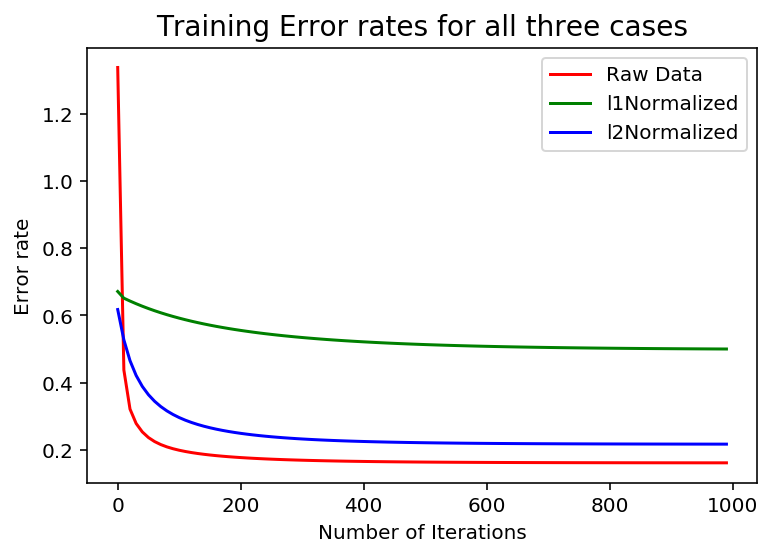

In [25]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(list(range(0,1000,10)), [err for i,err in enumerate(trainErrorRates) if (i%10  == 0)],  'r',label = "Raw Data")
ax.plot(list(range(0,1000,10)), [err for i,err in enumerate(trainErrorRatesL1Norm) if (i%10  == 0)],  'g', label = "l1Normalized")
ax.plot(list(range(0,1000,10)), [err for i,err in enumerate(trainErrorRatesL2Norm) if (i%10  == 0)],  'b', label = "l2Normalized")
legend = ax.legend()
plt.title("Training Error rates for all three cases", fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Error rate")
plt.show();

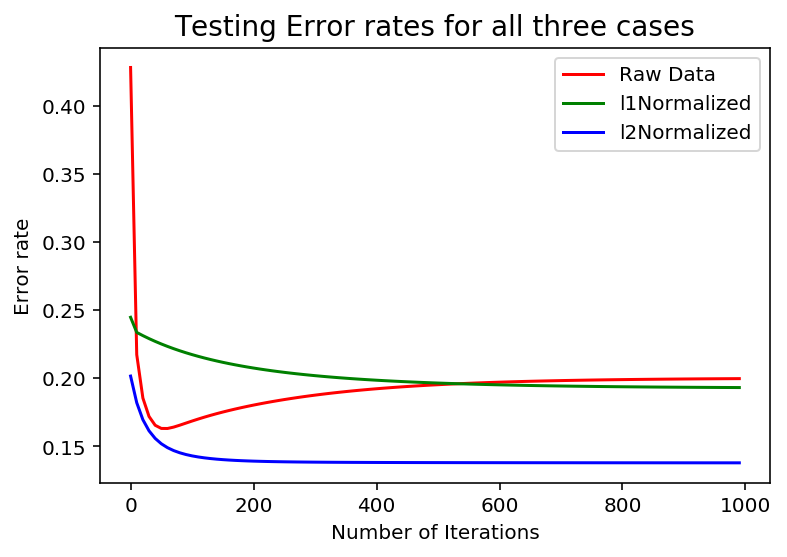

In [26]:
%config InlineBackend.figure_format = 'retina'
ax = plt.subplots()[1]
ax.plot(list(range(0,1000,10)), [err for i,err in enumerate(testErrorRates) if (i%10  == 0)],  'r',label = "Raw Data")
ax.plot(list(range(0,1000,10)), [err for i,err in enumerate(testErrorRatesL1Norm) if (i%10  == 0)],  'g', label = "l1Normalized")
ax.plot(list(range(0,1000,10)), [err for i,err in enumerate(testErrorRatesL2Norm) if (i%10  == 0)],  'b', label = "l2Normalized")
legend = ax.legend()
plt.title("Testing Error rates for all three cases", fontsize=14)
plt.xlabel("Number of Iterations")
plt.ylabel("Error rate")
plt.show();

### 2.3 Comparing the results of Logistic regression using Perceptron Algorithm and Logisitic Regression using Gradient Descent

I got the test error after training for 3 cases as follows:

normal perceptron
raw -  14.7, 
l1 - 15.1, 
l2 - 13.42, 


average perceptron
raw - 11.82,
l1 - 17.1,
l2 - 11.8,

logistic regression
raw - 20.01,
l1 - 19.33,
l2 - 13.6,

This shows that the performance of the both classifiers(i.e. Perceptron and Batch Logistic Regression using Gradient Descent) is almost the same since the data is linearly separable and both the algorithms are almost similar except that one is Online learning and the other is batch learning. Although it can be observed that in Logistic regression the error has a gradual value during iteration because we are using the batch algorithm.

## 3 Locally Weighted Logistic Regression

### 3.1 Computing gradient $ \bigtriangledown_{\beta}l(\beta) $ and Hessian matrix H =  $\bigtriangledown_{\beta} [\bigtriangledown_{\beta}l(\beta)] $

The given loss function:
$l(\beta) = \sum_{i=1}^{N} w^{i}\{y^{i}log[f_{\beta}(x^{i})) + (1 - y^{i})log[1-f_{\beta}(x^{i})]\}  - \lambda\beta^{T}\beta$

For $ \bigtriangledown_{\beta}l(\beta) $ :

$\frac{\partial l(\beta)}{\partial \beta_{j}}  = 
\sum_{i=1}^{N} 
w^{i}\{\dfrac{y^{i}}{f_{\beta}(x^{i})} 
\frac{\partial f_{\beta}(x^{i})}{\partial \beta_{j}}
- \dfrac{(1-y^{i})}{1 + f_{\beta}(x^{i})}
\frac{\partial f_{\beta}(x^{i})}{\partial \beta_{j}}
\} - 2\lambda\beta_{j} $ (1)

Calculating $\frac
{\partial f_{\beta}(x^{i})}
{\partial \beta_{j}} = 
\frac
{\partial {\sigma(\beta^{T}x^{i})}}
{\partial \beta_{j}}*x^{i}_{j}$
$\sigma(\beta^{T}x^{i})(1-\sigma(\beta^{T}x^{i}))*x^{i}_{j}$ (2)

Substuting (2) in (1)
$\frac{\partial l(\beta)}{\partial \beta_{j}}  = 
\sum_{i=1}^{N} w^{i}\{x^{i}_{j}(y^{i} - f_{\beta}(x^{i}))\}
- 2\lambda\beta_{j} $ (3)

Vectorizing this 

$ \bigtriangledown_{\beta}l(\beta)  =  (WX)^{T}(Y - f_{\beta}(X))$ 

Partial derivating (3) w.r.t $\beta_{k}$ and using (2). We get

$\frac{\partial}{\partial \beta_{k}}    \frac{\partial l(\beta)}{\partial \beta_{j}}  
= \sum_{i=1}^{N} x^{i}_{j} {x^{i}_{k}}f_{\beta}(x^{i})(1-f_{\beta}(x^{i}))$ (4)

Vectorizing this we get

$\bigtriangledown_{\beta} [\bigtriangledown_{\beta}l(\beta)] 
= -(WX)^{T}f_{\beta}(X)(1-f_{\beta}(X))^{T}X$

### 3.2 Newtons Method
#### 3.2.a Calculating the weight matrix as follows :

In [56]:
tau = [0.01,0.05,0.1,0.5,1.0,5.0]
def calculateW(feature_train,j):
    W = np.zeros([feature_train.shape[0],feature_train.shape[0]])
    global tau
#     print(feature_train)
#     print(W)
    for i, sample in enumerate(feature_train):
        foo = np.sum((np.power(feature_train - feature_train[i],2)),1)
#         print(foo)
        W[i] = np.exp(-1*foo/(2*tau[j]*tau[j]))
    return W

#### 3.2.b Maximizing $l(\beta)$ to learn $\beta$. 
#### 3.2.c Predicting Y based on weights calculated at each iteration. and calculating error rates

In [53]:

def preprocessDataSingluarMatrixProblem(feature_train, feature_test):
    ## Removing Second Column
    feature_train = np.column_stack((feature_train[:,0],feature_train[:,2:]))
#     print("feature_train ",feature_train)
    
    feature_test = np.column_stack((feature_test[:,0],feature_test[:,2:]))
#     print("feature_test ",feature_test)
    ## Adding bias column
    feature_train = np.column_stack((np.ones([feature_train.shape[0],1]),feature_train))
    feature_test = np.column_stack((np.ones([feature_test.shape[0],1]),feature_test))
#     print("feature_train ",feature_train)
#     print("feature_test ",feature_test)
    return feature_train, feature_test

# def trainErrorRate(train_data, train_labels,weights,bias, W):

def testErrorRate(feature_test, weights, label_test):
    fbXtest = sigmoid(np.dot(feature_test, weights))
    for i,e in enumerate(fbXtest):
        if (e<=0.5):
            fbXtest[i] = 1
        else:
            fbXtest[i] = 0
    numOfErrors = 0
    for i in range(fbXtest.shape[0]):
        if(label_test[i] != fbXtest[i]):
            numOfErrors+=1
    return numOfErrors/fbXtest.shape[0]*100
    
def trainWeightsLWLR(train_data, train_labels, test_data, test_labels, eta,j):
    np.random.seed(0)
    weights = np.random.randn(num_of_features)
    iterations = 100
     # Select the various tau values
    W = calculateW(train_data,j)
    testErrorRates = np.zeros(iterations)
    t=0
    wxT = np.matmul(W,train_data).T
#     wxT = (train_data).T
    
#     print("Shape of wxT  ",wxT.shape)
    while(t <iterations):

        fbX = sigmoid(np.dot(train_data, weights))
        _fbX = sigmoid(np.dot(-1*train_data, weights))
        temp = np.diag(fbX * _fbX)
#         print("Shape of fbX  ",fbX.shape)
#         H = -1 * np.dot( np.matmul(wxT,fbX).reshape((-1,1)) , np.matmul((_fbX).T,train_data).reshape((-1,1)).T)
        H = np.matmul(np.matmul(wxT,temp),wxT.T)
    
        weights += eta*np.matmul(np.linalg.pinv(H),weights)
#         print("weights", weights)
#         print("Weight update",np.matmul(np.linalg.pinv(H),weights))
        testErrorRates[t] = testError = testErrorRate(feature_test, weights, label_test)
        print("Running ",t,"Iterations, The Test Error rate is {:.2f}".format(testError-10))
#         break
#         if(t == 2):
#             break
        t+=1
    return weights,testError-10

In [54]:
eta = 0.1
feature_train,label_train,feature_test,label_test = acquireData()
preprocessLabels(label_test)
preprocessLabels(label_train)
feature_train, feature_test = preprocessDataSingluarMatrixProblem(feature_train, feature_test)
testErrorRates = np.zeros(6)
for j in range(6):
    weights,testErrorRates[j] = trainWeightsLWLR(feature_train, label_train, feature_test, label_test, eta, j)

Running  0 Iterations, The Test Error rate is 59.74
Running  1 Iterations, The Test Error rate is 68.95
Running  2 Iterations, The Test Error rate is 72.89
Running  3 Iterations, The Test Error rate is 72.89
Running  4 Iterations, The Test Error rate is 11.05
Running  5 Iterations, The Test Error rate is 11.05
Running  6 Iterations, The Test Error rate is 11.05
Running  7 Iterations, The Test Error rate is 11.05
Running  8 Iterations, The Test Error rate is 11.05
Running  9 Iterations, The Test Error rate is 11.05
Running  10 Iterations, The Test Error rate is 11.05
Running  11 Iterations, The Test Error rate is 11.05
Running  12 Iterations, The Test Error rate is 11.05
Running  13 Iterations, The Test Error rate is 11.05
Running  14 Iterations, The Test Error rate is 11.05
Running  15 Iterations, The Test Error rate is 11.05
Running  16 Iterations, The Test Error rate is 11.05
Running  17 Iterations, The Test Error rate is 11.05
Running  18 Iterations, The Test Error rate is 11.05
Run

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


Running  0 Iterations, The Test Error rate is 59.74
Running  1 Iterations, The Test Error rate is 68.95
Running  2 Iterations, The Test Error rate is 72.89
Running  3 Iterations, The Test Error rate is 72.89
Running  4 Iterations, The Test Error rate is 34.74
Running  5 Iterations, The Test Error rate is 34.74
Running  6 Iterations, The Test Error rate is 34.74
Running  7 Iterations, The Test Error rate is 34.74
Running  8 Iterations, The Test Error rate is 34.74
Running  9 Iterations, The Test Error rate is 34.74
Running  10 Iterations, The Test Error rate is 34.74
Running  11 Iterations, The Test Error rate is 34.74
Running  12 Iterations, The Test Error rate is 34.74
Running  13 Iterations, The Test Error rate is 34.74
Running  14 Iterations, The Test Error rate is 34.74
Running  15 Iterations, The Test Error rate is 34.74
Running  16 Iterations, The Test Error rate is 34.74
Running  17 Iterations, The Test Error rate is 34.74
Running  18 Iterations, The Test Error rate is 34.74
Run

In [55]:
testErrorRates

array([ 11.05263158,  34.73684211,  46.57894737,  66.31578947,
        25.52631579,  36.05263158])

### 3.2.4 Ploting the error rates with respect to $\tau$ 
Error rate for tau= 1 has come down when compared to question 1. But for other values it has increased. This also accounts for higher computation. In this case since it is linearly separable data second order optimization is not a good way to optimize.

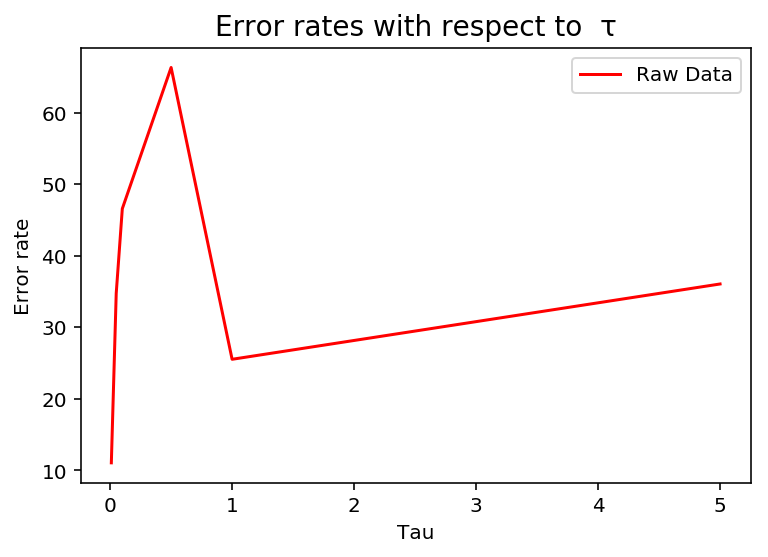

In [59]:
%config InlineBackend.figure_format = 'retina'
plt.plot(tau,testErrorRates,  'r',label = "Raw Data")
legend = plt.legend()
plt.title("Error rates with respect to  τ", fontsize=14)
plt.xlabel("Tau")
plt.ylabel("Error rate")
plt.show();